# Cleaning Multiple Household Data
[Data Source](https://www.kaggle.com/nwheeler443/london-smart-meter-analysis-of-half-hourly-data/data)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:
# Data source location
# A lot of data files so this takes a while
files = glob.glob('./household_power_consumption/halfhourly_dataset/block_*.csv')

# split dataset in different dataframes
houses = [pd.read_csv(f, sep=',', low_memory=False) for f in files]

print('Amount of different files: ' + str(len(houses)))

Amount of different files: 112


In [3]:
houses[0].head()
# LCLid; id of smart meter in household
# tstp; timestamp
# energy; kWh/hh

,LCLid,tstp,energy(kWh/hh)
0,MAC000002,2012-10-12 00:30:00.0000000,0
1,MAC000002,2012-10-12 01:00:00.0000000,0
2,MAC000002,2012-10-12 01:30:00.0000000,0
3,MAC000002,2012-10-12 02:00:00.0000000,0
4,MAC000002,2012-10-12 02:30:00.0000000,0


In [4]:
total = 0

for house in houses:
    total += len(house)
    
print("Amount of rows: " + str(total))
print("Amount of columns: " + str(len(houses[0].columns)))

Amount of rows: 167817021
Amount of columns: 3


In [5]:
houses[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1222670 entries, 0 to 1222669
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   LCLid           1222670 non-null  object
 1   tstp            1222670 non-null  object
 2   energy(kWh/hh)  1222670 non-null  object
dtypes: object(3)
memory usage: 28.0+ MB


In [6]:
# 'Null' found in energy column
houses[0][houses[0]['energy(kWh/hh)'].str.match('Null')].head()

,LCLid,tstp,energy(kWh/hh)
3238,MAC000002,2012-12-19 12:37:27.0000000,Null
42441,MAC000246,2012-12-18 15:13:37.0000000,Null
76341,MAC000450,2012-12-18 15:15:38.0000000,Null
94080,MAC001074,2012-12-18 15:18:11.0000000,Null
98616,MAC003223,2012-12-18 15:23:00.0000000,Null


In [7]:
# replace 'Null' with NaN
total = 0

for house in houses:
    house.replace('Null', np.NaN, inplace=True)
    total += house.isnull().sum()

# how many NaN values?
print(total)

LCLid                0
tstp                 0
energy(kWh/hh)    5560
dtype: int64


In [8]:
# drop rows with NaN
for house in houses:
    house.dropna(subset=['energy(kWh/hh)'], inplace=True)

In [9]:
# convert columns to right type
for house in houses:
    house['tstp'] = pd.to_datetime(house['tstp'])
    house['energy(kWh/hh)'] = house['energy(kWh/hh)'].astype(float, errors = 'raise')

houses[0].head()

,LCLid,tstp,energy(kWh/hh)
0,MAC000002,2012-10-12 00:30:00,0.0
1,MAC000002,2012-10-12 01:00:00,0.0
2,MAC000002,2012-10-12 01:30:00,0.0
3,MAC000002,2012-10-12 02:00:00,0.0
4,MAC000002,2012-10-12 02:30:00,0.0


In [10]:
# split tstp column into Date and Time
for house in houses:
    house['Date'] = house['tstp'].dt.date
    house['Time'] = house['tstp'].dt.time
houses[0].head()

,LCLid,tstp,energy(kWh/hh),Date,Time
0,MAC000002,2012-10-12 00:30:00,0.0,2012-10-12,00:30:00
1,MAC000002,2012-10-12 01:00:00,0.0,2012-10-12,01:00:00
2,MAC000002,2012-10-12 01:30:00,0.0,2012-10-12,01:30:00
3,MAC000002,2012-10-12 02:00:00,0.0,2012-10-12,02:00:00
4,MAC000002,2012-10-12 02:30:00,0.0,2012-10-12,02:30:00


In [11]:
# energy Kwh/hh needs to be converted to Kw
# Kwh/hh * 2 = Kw
for house in houses:
    house['energy(kW)'] = house['energy(kWh/hh)'] * 2

In [12]:
# find all different households
different_households = []

for house in houses:
    for x in house['LCLid'].unique():
        different_households.append(x)

print('Amount of different households: ' + str(len(different_households)))

Amount of different households: 5561


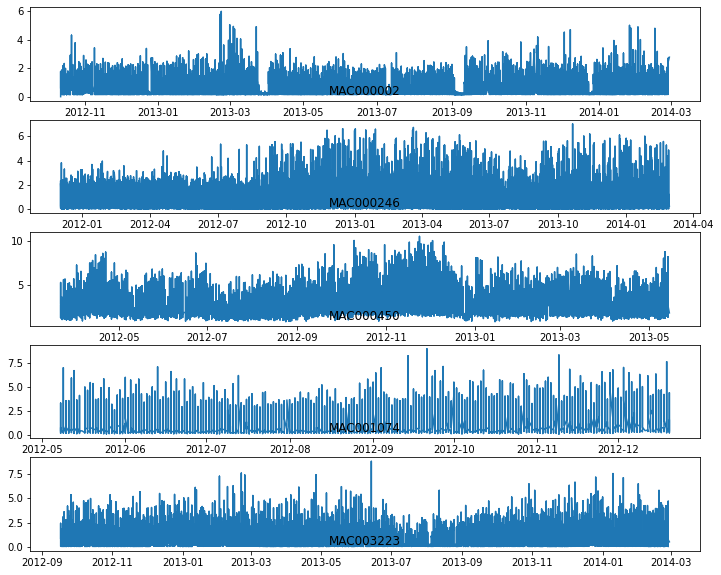

In [13]:
# select 5 household 
plt.figure(figsize=(12,10))
household_ids = ['MAC000002', 'MAC000246', 'MAC000450', 'MAC001074', 'MAC003223']

# visualise data per day for 5 household
for household in range(len(household_ids)):
    ax = plt.subplot(len(household_ids), 1, 1+household)
    res = houses[0][houses[0]['LCLid'] == household_ids[household]]
    plt.plot(res['Date'], res['energy(kW)'])
    plt.title(household_ids[household], y=0)
plt.show()

# not every household has the same amount of data available

In [14]:
houses[0].head()

,LCLid,tstp,energy(kWh/hh),Date,Time,energy(kW)
0,MAC000002,2012-10-12 00:30:00,0.0,2012-10-12,00:30:00,0.0
1,MAC000002,2012-10-12 01:00:00,0.0,2012-10-12,01:00:00,0.0
2,MAC000002,2012-10-12 01:30:00,0.0,2012-10-12,01:30:00,0.0
3,MAC000002,2012-10-12 02:00:00,0.0,2012-10-12,02:00:00,0.0
4,MAC000002,2012-10-12 02:30:00,0.0,2012-10-12,02:30:00,0.0


In [15]:
import random

# every household in London area
# latitude range: 51.387548, 51.711046
# longitude range: -0.251467, 0.118287

for house in houses:
    # add latitude and longitude column
    house["Latitude"] = pd.NaT
    house["Longitude"] = pd.NaT
    
    for house_id in house['LCLid'].unique():
        latitude = round(random.uniform(51.387548, 51.711046), 6)
        longitude = round(random.uniform(-0.251467, 0.118287), 6)
        house.loc[house.LCLid == house_id, ["Latitude", "Longitude"]] = latitude, longitude
        
houses[0].head(10)

,LCLid,tstp,energy(kWh/hh),Date,Time,energy(kW),Latitude,Longitude
0,MAC000002,2012-10-12 00:30:00,0.0,2012-10-12,00:30:00,0.0,51.573476,0.00023
1,MAC000002,2012-10-12 01:00:00,0.0,2012-10-12,01:00:00,0.0,51.573476,0.00023
2,MAC000002,2012-10-12 01:30:00,0.0,2012-10-12,01:30:00,0.0,51.573476,0.00023
3,MAC000002,2012-10-12 02:00:00,0.0,2012-10-12,02:00:00,0.0,51.573476,0.00023
4,MAC000002,2012-10-12 02:30:00,0.0,2012-10-12,02:30:00,0.0,51.573476,0.00023
5,MAC000002,2012-10-12 03:00:00,0.0,2012-10-12,03:00:00,0.0,51.573476,0.00023
6,MAC000002,2012-10-12 03:30:00,0.0,2012-10-12,03:30:00,0.0,51.573476,0.00023
7,MAC000002,2012-10-12 04:00:00,0.0,2012-10-12,04:00:00,0.0,51.573476,0.00023
8,MAC000002,2012-10-12 04:30:00,0.0,2012-10-12,04:30:00,0.0,51.573476,0.00023
9,MAC000002,2012-10-12 05:00:00,0.0,2012-10-12,05:00:00,0.0,51.573476,0.00023


In [16]:
# create new dataframe and reformat the data
houses_filtered = []

for house in houses:
    house.rename(columns={'energy(kW)':'Global_active_power'}, inplace=True)
    
    house_filtered = house[['Date', 'Time', 'Latitude', 'Longitude', 'Global_active_power']]

    house_filtered.insert(4,'House_or_apartment', 0) # 0 house, 1 apartment
    house_filtered.insert(5,'Area_of_residence', 0) # to be inserted in meters squared
    house_filtered.insert(6,'House_is_isolated', 0) # 0 no, 1 yes
    house_filtered.insert(7,'Number_of_residents', 0) # to be an unsigned number
    house_filtered.insert(8,'Heating_type', 0) # 0 electrical, 1 gas
    house_filtered.insert(9,'Solar_panels', 0) # 0 don't use, 1 use
    houses_filtered.append(house_filtered)

houses_filtered[0].head()

,Date,Time,Latitude,Longitude,House_or_apartment,Area_of_residence,House_is_isolated,Number_of_residents,Heating_type,Solar_panels,Global_active_power
0,2012-10-12,00:30:00,51.573476,0.00023,0,0,0,0,0,0,0.0
1,2012-10-12,01:00:00,51.573476,0.00023,0,0,0,0,0,0,0.0
2,2012-10-12,01:30:00,51.573476,0.00023,0,0,0,0,0,0,0.0
3,2012-10-12,02:00:00,51.573476,0.00023,0,0,0,0,0,0,0.0
4,2012-10-12,02:30:00,51.573476,0.00023,0,0,0,0,0,0,0.0


In [ ]:
for i, _df in enumerate(houses_filtered):
    filename = './household_power_consumption/halfhourly_dataset_cleaned/block_' + str(i) + '.csv'
    print(filename)
    _df.to_csv(filename)

./household_power_consumption/halfhourly_dataset_cleaned/block_0.csv
./household_power_consumption/halfhourly_dataset_cleaned/block_1.csv
./household_power_consumption/halfhourly_dataset_cleaned/block_2.csv
./household_power_consumption/halfhourly_dataset_cleaned/block_3.csv
./household_power_consumption/halfhourly_dataset_cleaned/block_4.csv
./household_power_consumption/halfhourly_dataset_cleaned/block_5.csv
./household_power_consumption/halfhourly_dataset_cleaned/block_6.csv
./household_power_consumption/halfhourly_dataset_cleaned/block_7.csv
./household_power_consumption/halfhourly_dataset_cleaned/block_8.csv
./household_power_consumption/halfhourly_dataset_cleaned/block_9.csv
./household_power_consumption/halfhourly_dataset_cleaned/block_10.csv
./household_power_consumption/halfhourly_dataset_cleaned/block_11.csv
./household_power_consumption/halfhourly_dataset_cleaned/block_12.csv
./household_power_consumption/halfhourly_dataset_cleaned/block_13.csv
./household_power_consumption/